# Mag TOV (Uniform Grid)

In [1]:
using Plots, Printf, Measures
using LaTeXStrings
include("../../Utils/misc-stdout.jl")

Main.MiscStdout

## Scaling

Zcs/sec
  magTOV-Cow-Uniform: [ 7.15e+07, 1.41e+08, 2.74e+08, 5.21e+08, 1.05e+09, 2.03e+09, 4.09e+09]


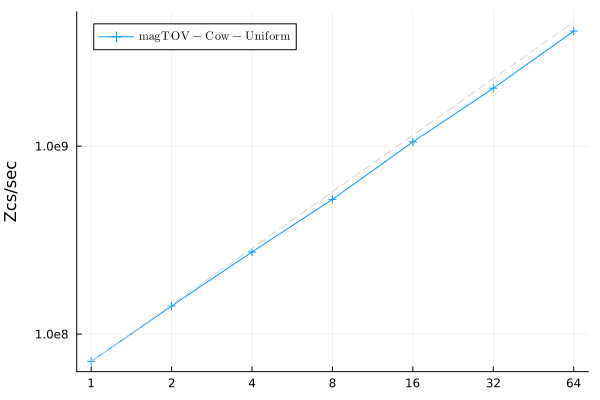

In [2]:
let patt_dirss = [
        ([
            (r"magTOV_Cow_UNI_N\d+_r0000", "magTOV-Cow-Uniform"),
        ], "../data/magTOV-Scaling/Uniform/Weak/", :cross),
    ]

    # Plot Zcs/sec
    plt = plot(ylabel="Zcs/sec", xscale=:log10, yscale=:log10)
    xs = [1, 2, 4, 8, 16, 32, 64]
    xticks!(plt, xs, [string(n) for n in xs])
    ys = [1e8, 1e9, 1e10]
    yticks!(plt, ys, [string(n) for n in ys])
    
    println("Zcs/sec")
    for (patterns, parent_dir, mark) in patt_dirss
        # Load averages for the given patterns and directory
        dats, labs = MiscStdout.load_avgs(patterns, parent_dir; option = "ZcsPerSecond")
        # Iterate through the loaded datasets
        for (i, dat) in enumerate(dats)
            plot!(plt, dat[1], dat[2], label = L"\mathrm{%$(labs[i])}", marker = mark)
            plot!(plt, dat[1], dat[2][1] .* dat[1], label="", linestyle=:dash, color=:lightgray)
            @printf("  %8s: [", labs[i])
            println(join([@sprintf(" %8.2e", d) for d in dat[2]], ","), "]")
        end
    end

    display(plt)
end

## Speed

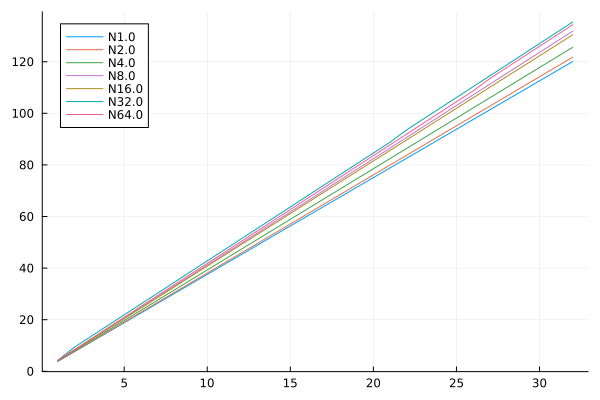

In [5]:
let patt_dirss = [
        ([
            (r"magTOV_Cow_UNI_N\d+_r0000", ""),
        ], "../data/magTOV-Scaling/Uniform/Weak/", :cross),
    ]
    
    #
    plts = []
    for (patterns, parent_dir, mark) in patt_dirss
        (vals, titles) = MiscStdout.load_values(patterns, parent_dir; option="TotalComputeTime")
        for (j, val) in enumerate(vals)
            (dats, labs) = val
            plt = plot(title=titles[j])
            for (i, dat) in enumerate(dats)
                plot!(plt, dat[1], dat[4], label=labs[i])
            end
            push!(plts, plt)
        end
    end
    
    plt = plot(plts..., layout=(1,1))
    display(plt)
end